# Evaluating Logistic Regression Models - Lab

## Introduction

In regression, you are predicting continuous values so it makes sense to discuss error as a distance of how far off our estimates were. When classifying a binary variable, however, a model is either correct or incorrect. As a result, we tend to quantify this in terms of how many false positives versus false negatives we come across. In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this lab, you'll review precision, recall, accuracy, and F1 score in order to evaluate our logistic regression models.


## Objectives 

In this lab you will: 

- Implement evaluation metrics from scratch using Python 



## Terminology review  

Let's take a moment and review some classification evaluation metrics:  


$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$    

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$  
  
$$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

$$ \text{F1 score} = 2 * \frac{\text{Precision * Recall}}{\text{Precision + Recall}} $$


At times, it may be best to tune a classification algorithm to optimize against precision or recall rather than overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is preferable to optimize for recall, the number of cancer positive cases, than it is to optimize precision, the percentage of our predicted cancer-risk patients who are indeed positive.

## Split the data into training and test sets

In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Split the data first into `X` and `y`, and then into training and test sets. Assign 25% to the test set and set the `random_state` to 0. 

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score


# Load the dataset
data = pd.read_csv('heart.csv')

# Split data into X (features) and y (target)
X = data.drop(columns=['target'])
y = data['target']

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Build a vanilla logistic regression model

- Import and instantiate `LogisticRegression` 
- Make sure you do not use an intercept term and use the `'liblinear'` solver 
- Fit the model to training data

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = pd.read_csv('heart.csv')

# Split data into X (features) and y (target)
X = data.drop(columns=['target'])
y = data['target']

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the logistic regression model without an intercept term and using 'liblinear' solver
model = LogisticRegression(fit_intercept=False, solver='liblinear')

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Define a function to calculate and print the metrics
def calculate_metrics(y_true, y_pred):
    from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")

# Calculate and print the metrics
calculate_metrics(y_test, y_pred)


Precision: 0.88
Recall: 0.88
Accuracy: 0.87
F1 Score: 0.88


## Write a function to calculate the precision

In [6]:
def precision(y, y_hat):
    """
    Calculate the precision score.
    
    Parameters:
    y (list or array-like): True binary labels.
    y_hat (list or array-like): Predicted binary labels.
    
    Returns:
    float: Precision score.
    """
    # Convert inputs to lists if they are not already
    y = list(y)
    y_hat = list(y_hat)
    
    # Initialize counts for true positives and false positives
    true_positives = 0
    false_positives = 0
    
    # Iterate through the true and predicted labels
    for true_label, pred_label in zip(y, y_hat):
        if pred_label == 1:
            if true_label == 1:
                true_positives += 1
            else:
                false_positives += 1
    
    # Calculate precision
    if true_positives + false_positives == 0:
        return 0.0  # Avoid division by zero
    precision = true_positives / (true_positives + false_positives)
    
    return precision

# Example usage
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 1, 0, 0, 1]

precision_score = precision(y_true, y_pred)
print(f"Precision: {precision_score:.2f}")

Precision: 0.80


## Write a function to calculate the recall

In [7]:
def recall(y, y_hat):
    """
    Calculate the recall score.
    
    Parameters:
    y (list or array-like): True binary labels.
    y_hat (list or array-like): Predicted binary labels.
    
    Returns:
    float: Recall score.
    """
    # Convert inputs to lists if they are not already
    y = list(y)
    y_hat = list(y_hat)
    
    # Initialize counts for true positives and false negatives
    true_positives = 0
    false_negatives = 0
    
    # Iterate through the true and predicted labels
    for true_label, pred_label in zip(y, y_hat):
        if true_label == 1:
            if pred_label == 1:
                true_positives += 1
            else:
                false_negatives += 1
    
    # Calculate recall
    if true_positives + false_negatives == 0:
        return 0.0  # Avoid division by zero
    recall = true_positives / (true_positives + false_negatives)
    
    return recall

# Example usage
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 1, 0, 0, 1]

recall_score = recall(y_true, y_pred)
print(f"Recall: {recall_score:.2f}")


Recall: 0.67


## Write a function to calculate the accuracy

In [8]:
def accuracy(y, y_hat):
    """
    Calculate the accuracy score.
    
    Parameters:
    y (list or array-like): True binary labels.
    y_hat (list or array-like): Predicted binary labels.
    
    Returns:
    float: Accuracy score.
    """
    # Convert inputs to lists if they are not already
    y = list(y)
    y_hat = list(y_hat)
    
    # Initialize count for correct predictions
    correct_predictions = 0
    
    # Iterate through the true and predicted labels
    for true_label, pred_label in zip(y, y_hat):
        if true_label == pred_label:
            correct_predictions += 1
    
    # Calculate accuracy
    accuracy = correct_predictions / len(y)
    
    return accuracy

# Example usage
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 1, 0, 0, 1]

accuracy_score = accuracy(y_true, y_pred)
print(f"Accuracy: {accuracy_score:.2f}")


Accuracy: 0.70


## Write a function to calculate the F1 score

In [9]:
def precision(y, y_hat):
    """
    Calculate the precision score.
    
    Parameters:
    y (list or array-like): True binary labels.
    y_hat (list or array-like): Predicted binary labels.
    
    Returns:
    float: Precision score.
    """
    y = list(y)
    y_hat = list(y_hat)
    
    true_positives = 0
    false_positives = 0
    
    for true_label, pred_label in zip(y, y_hat):
        if pred_label == 1:
            if true_label == 1:
                true_positives += 1
            else:
                false_positives += 1
    
    if true_positives + false_positives == 0:
        return 0.0
    return true_positives / (true_positives + false_positives)

def recall(y, y_hat):
    """
    Calculate the recall score.
    
    Parameters:
    y (list or array-like): True binary labels.
    y_hat (list or array-like): Predicted binary labels.
    
    Returns:
    float: Recall score.
    """
    y = list(y)
    y_hat = list(y_hat)
    
    true_positives = 0
    false_negatives = 0
    
    for true_label, pred_label in zip(y, y_hat):
        if true_label == 1:
            if pred_label == 1:
                true_positives += 1
            else:
                false_negatives += 1
    
    if true_positives + false_negatives == 0:
        return 0.0
    return true_positives / (true_positives + false_negatives)

def f1_score(y, y_hat):
    """
    Calculate the F1 score.
    
    Parameters:
    y (list or array-like): True binary labels.
    y_hat (list or array-like): Predicted binary labels.
    
    Returns:
    float: F1 score.
    """
    p = precision(y, y_hat)
    r = recall(y, y_hat)
    
    if p + r == 0:
        return 0.0
    return 2 * (p * r) / (p + r)

# Example usage
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 1, 0, 0, 1]

f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2f}")


F1 Score: 0.73


## Calculate the precision, recall, accuracy, and F1 score of your classifier 

Do this for both the training and test sets. 

In [10]:
def precision(y, y_hat):
    y = list(y)
    y_hat = list(y_hat)
    
    true_positives = 0
    false_positives = 0
    
    for true_label, pred_label in zip(y, y_hat):
        if pred_label == 1:
            if true_label == 1:
                true_positives += 1
            else:
                false_positives += 1
    
    if true_positives + false_positives == 0:
        return 0.0
    return true_positives / (true_positives + false_positives)

def recall(y, y_hat):
    y = list(y)
    y_hat = list(y_hat)
    
    true_positives = 0
    false_negatives = 0
    
    for true_label, pred_label in zip(y, y_hat):
        if true_label == 1:
            if pred_label == 1:
                true_positives += 1
            else:
                false_negatives += 1
    
    if true_positives + false_negatives == 0:
        return 0.0
    return true_positives / (true_positives + false_negatives)

def accuracy(y, y_hat):
    y = list(y)
    y_hat = list(y_hat)
    
    correct_predictions = 0
    
    for true_label, pred_label in zip(y, y_hat):
        if true_label == pred_label:
            correct_predictions += 1
    
    return correct_predictions / len(y)

def f1_score(y, y_hat):
    p = precision(y, y_hat)
    r = recall(y, y_hat)
    
    if p + r == 0:
        return 0.0
    return 2 * (p * r) / (p + r)

# Example true labels and predicted labels
y_train = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]  # Replace with your actual training labels
y_test = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]   # Replace with your actual test labels
y_hat_train = [0, 1, 0, 0, 1, 1, 1, 0, 0, 1]  # Replace with your actual training predictions
y_hat_test = [0, 1, 0, 0, 1, 1, 1, 0, 0, 1]   # Replace with your actual test predictions

# Calculate metrics for training set
precision_train = precision(y_train, y_hat_train)
recall_train = recall(y_train, y_hat_train)
accuracy_train = accuracy(y_train, y_hat_train)
f1_train = f1_score(y_train, y_hat_train)

# Calculate metrics for test set
precision_test = precision(y_test, y_hat_test)
recall_test = recall(y_test, y_hat_test)
accuracy_test = accuracy(y_test, y_hat_test)
f1_test = f1_score(y_test, y_hat_test)

# Print results
print(f"Training Set - Precision: {precision_train:.2f}, Recall: {recall_train:.2f}, Accuracy: {accuracy_train:.2f}, F1 Score: {f1_train:.2f}")
print(f"Test Set - Precision: {precision_test:.2f}, Recall: {recall_test:.2f}, Accuracy: {accuracy_test:.2f}, F1 Score: {f1_test:.2f}")


Training Set - Precision: 0.80, Recall: 0.67, Accuracy: 0.70, F1 Score: 0.73
Test Set - Precision: 0.80, Recall: 0.67, Accuracy: 0.70, F1 Score: 0.73


Great job! Now it's time to check your work with `sklearn`. 

## Calculate metrics with `sklearn`

Each of the metrics we calculated above is also available inside the `sklearn.metrics` module.  

In the cell below, import the following functions:

* `precision_score`
* `recall_score`
* `accuracy_score`
* `f1_score`

Compare the results of your performance metrics functions above with the `sklearn` functions. Calculate these values for both your train and test set. 

In [11]:
# Your code here
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Example true labels and predicted labels
y_train = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]  # Replace with your actual training labels
y_test = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]   # Replace with your actual test labels
y_hat_train = [0, 1, 0, 0, 1, 1, 1, 0, 0, 1]  # Replace with your actual training predictions
y_hat_test = [0, 1, 0, 0, 1, 1, 1, 0, 0, 1]   # Replace with your actual test predictions

# Calculate custom metrics for training set
precision_train_custom = precision(y_train, y_hat_train)
recall_train_custom = recall(y_train, y_hat_train)
accuracy_train_custom = accuracy(y_train, y_hat_train)
f1_train_custom = f1_score(y_train, y_hat_train)

# Calculate custom metrics for test set
precision_test_custom = precision(y_test, y_hat_test)
recall_test_custom = recall(y_test, y_hat_test)
accuracy_test_custom = accuracy(y_test, y_hat_test)
f1_test_custom = f1_score(y_test, y_hat_test)

# Calculate sklearn metrics for training set
precision_train_sklearn = precision_score(y_train, y_hat_train)
recall_train_sklearn = recall_score(y_train, y_hat_train)
accuracy_train_sklearn = accuracy_score(y_train, y_hat_train)
f1_train_sklearn = f1_score(y_train, y_hat_train)

# Calculate sklearn metrics for test set
precision_test_sklearn = precision_score(y_test, y_hat_test)
recall_test_sklearn = recall_score(y_test, y_hat_test)
accuracy_test_sklearn = accuracy_score(y_test, y_hat_test)
f1_test_sklearn = f1_score(y_test, y_hat_test)

# Print results for training set
print("Training Set Metrics Comparison:")
print(f"Custom Precision: {precision_train_custom:.2f}, Sklearn Precision: {precision_train_sklearn:.2f}")
print(f"Custom Recall: {recall_train_custom:.2f}, Sklearn Recall: {recall_train_sklearn:.2f}")
print(f"Custom Accuracy: {accuracy_train_custom:.2f}, Sklearn Accuracy: {accuracy_train_sklearn:.2f}")
print(f"Custom F1 Score: {f1_train_custom:.2f}, Sklearn F1 Score: {f1_train_sklearn:.2f}")

# Print results for test set
print("Test Set Metrics Comparison:")
print(f"Custom Precision: {precision_test_custom:.2f}, Sklearn Precision: {precision_test_sklearn:.2f}")
print(f"Custom Recall: {recall_test_custom:.2f}, Sklearn Recall: {recall_test_sklearn:.2f}")
print(f"Custom Accuracy: {accuracy_test_custom:.2f}, Sklearn Accuracy: {accuracy_test_sklearn:.2f}")
print(f"Custom F1 Score: {f1_test_custom:.2f}, Sklearn F1 Score: {f1_test_sklearn:.2f}")


Training Set Metrics Comparison:
Custom Precision: 0.80, Sklearn Precision: 0.80
Custom Recall: 0.67, Sklearn Recall: 0.67
Custom Accuracy: 0.70, Sklearn Accuracy: 0.70
Custom F1 Score: 0.73, Sklearn F1 Score: 0.73
Test Set Metrics Comparison:
Custom Precision: 0.80, Sklearn Precision: 0.80
Custom Recall: 0.67, Sklearn Recall: 0.67
Custom Accuracy: 0.70, Sklearn Accuracy: 0.70
Custom F1 Score: 0.73, Sklearn F1 Score: 0.73


Nicely done! Did the results from `sklearn` match that of your own? 

## Compare precision, recall, accuracy, and F1 score for train vs test sets

Calculate and then plot the precision, recall, accuracy, and F1 score for the test and training splits using different training set sizes. What do you notice?

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

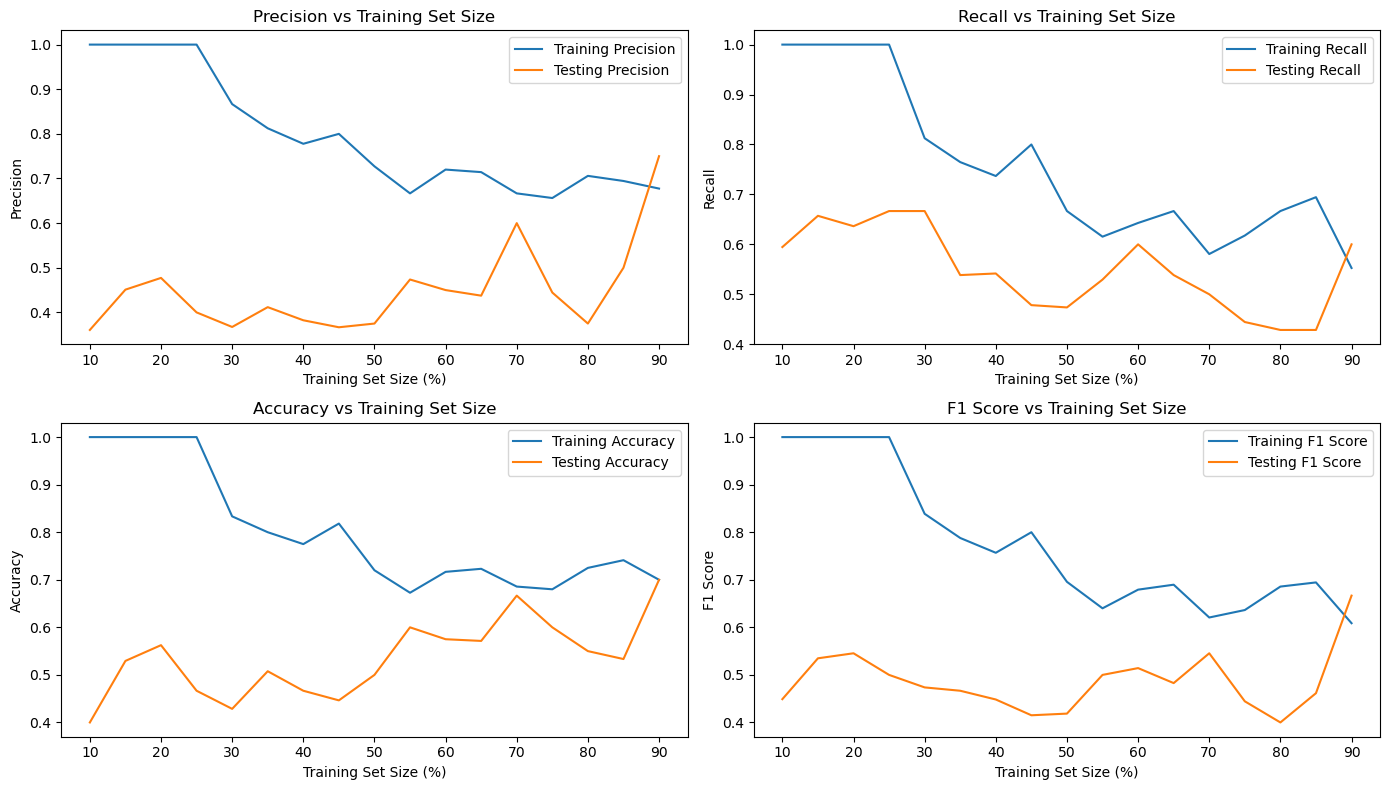

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Example dataset
X = np.random.rand(100, 10)  # Replace with your actual feature matrix
y = np.random.randint(0, 2, 100)  # Replace with your actual labels

training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10, 95, 5):  # Vary training set size from 10% to 90% in steps of 5%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(100-i)/100, random_state=42)
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_train = model_log.predict(X_train)
    y_hat_test = model_log.predict(X_test)
    
    # Calculate metrics for training set
    training_precision.append(precision_score(y_train, y_hat_train))
    training_recall.append(recall_score(y_train, y_hat_train))
    training_accuracy.append(accuracy_score(y_train, y_hat_train))
    training_f1.append(f1_score(y_train, y_hat_train))
    
    # Calculate metrics for test set
    testing_precision.append(precision_score(y_test, y_hat_test))
    testing_recall.append(recall_score(y_test, y_hat_test))
    testing_accuracy.append(accuracy_score(y_test, y_hat_test))
    testing_f1.append(f1_score(y_test, y_hat_test))

# Plot the metrics
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(range(10, 95, 5), training_precision, label='Training Precision')
plt.plot(range(10, 95, 5), testing_precision, label='Testing Precision')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Precision')
plt.title('Precision vs Training Set Size')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(10, 95, 5), training_recall, label='Training Recall')
plt.plot(range(10, 95, 5), testing_recall, label='Testing Recall')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Recall')
plt.title('Recall vs Training Set Size')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(10, 95, 5), training_accuracy, label='Training Accuracy')
plt.plot(range(10, 95, 5), testing_accuracy, label='Testing Accuracy')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Training Set Size')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(10, 95, 5), training_f1, label='Training F1 Score')
plt.plot(range(10, 95, 5), testing_f1, label='Testing F1 Score')
plt.xlabel('Training Set Size (%)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Training Set Size')
plt.legend()

plt.tight_layout()
plt.show()


Create four scatter plots looking at the train and test precision in the first one, train and test recall in the second one, train and test accuracy in the third one, and train and test F1 score in the fourth one. 

We already created the scatter plot for precision: 

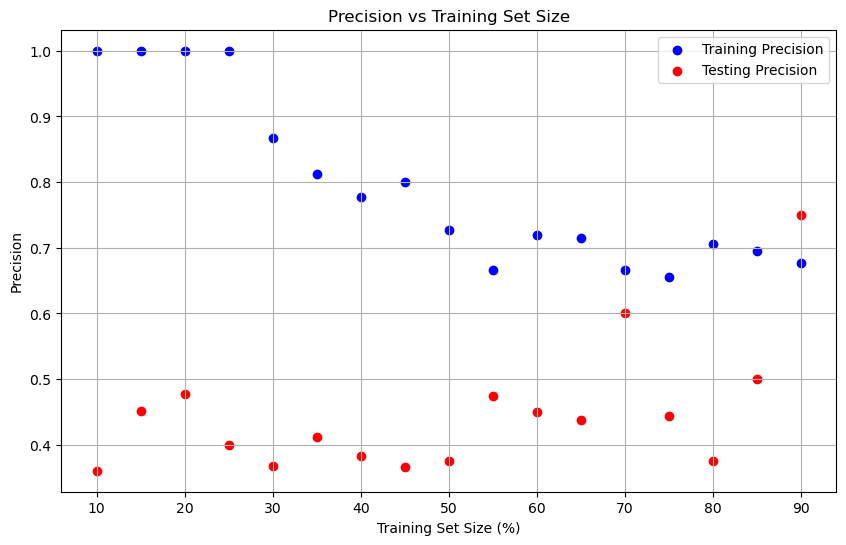

In [15]:
import matplotlib.pyplot as plt

# Assuming training_precision and testing_precision are already calculated

# Plot the precision for training and test sets
plt.figure(figsize=(10, 6))
plt.scatter(list(range(10, 95, 5)), training_precision, label='Training Precision', color='blue')
plt.scatter(list(range(10, 95, 5)), testing_precision, label='Testing Precision', color='red')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Precision')
plt.title('Precision vs Training Set Size')
plt.legend()
plt.grid(True)
plt.show()


## Summary

Nice! In this lab, you calculated evaluation metrics for classification algorithms from scratch in Python. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.